In [14]:
import open3d as o3d
import warnings
import pdb
import os
import numpy as np
import open3d as o3d
import re


# Visualize the point cloud
# o3d.visualization.draw_geometries([point_cloud])


# data structure

In [15]:
# class Node:
#     def __init__(self, node_id, features):
#         self.node_id = node_id
#         self.features = features  # Dictionary of features, e.g., {'visible_degree': value}

# class Event:
#     def __init__(self, source_node, dest_node, timestamp, label, event_index):
#         self.source_node = source_node
#         self.dest_node = dest_node
#         self.timestamp = timestamp
#         self.label = label
#         self.event_index = event_index

# # Example structures
# nodes = {node_id: Node(node_id, features) for node_id, features in nodes_data}
# events = [Event(source, dest, timestamp, label, index) for source, dest, timestamp, label, index in events_data]

# # Adjacency list for node events, can be used to track events over time for each node
# node_events = {node_id: [] for node_id in nodes}
# for event in events:
#     node_events[event.source_node].append(event)

    

# check x,y,z min and max

In [16]:
cell_file_path = './tile_data/recons/1051/'


# Assuming 'directory' is the path to the directory containing the files
# cell_file_path = '/path/to/your/files'
file_pattern = re.compile(r'longdress_\d+_(\d+)_(\d+)_(\d+)_\d+\.ply')

# Initialize min and max indices with None
min_indices = [None, None, None]
max_indices = [None, None, None]

# Iterate over all files in the directory
for filename in os.listdir(cell_file_path):
    match = file_pattern.match(filename)
    if match:
        indices = [int(match.group(i)) for i in range(1, 4)]
        for i, index in enumerate(indices):
            if min_indices[i] is None or index < min_indices[i]:
                min_indices[i] = index
            if max_indices[i] is None or index > max_indices[i]:
                max_indices[i] = index

# Print the results
print(f"Minimum indices: {min_indices}")
print(f"Maximum indices: {max_indices}")



Minimum indices: [5, 0, 5]
Maximum indices: [10, 15, 10]


# render one x,y,z

In [17]:
# please refer to 'open3d_test.py'
# we know it is x,y,z

# give index of node

## test

In [3]:
# set x,y,z has a,b,c max index
# q = y* (ac) + z*a +x
# 16*16=256
x,y,z = 5,10,9

In [ ]:
list = [] 

In [2]:
node_index = y*256 + z* 16 + x
# node_index
z_x = node_index%(256)
y1 = int(node_index/256)
x1 = z_x % 16
z1 = int(z_x/16)
x1,y1,z1

(5, 10, 9)

## cell2node and node2cell

In [20]:
from collections import defaultdict
cell2node = defaultdict(int)
node2cell = defaultdict(tuple)
for y in range(16):
    for z in range(16):
        for x in range(16):
            cell2node[tuple([x,y,z])] = y*256 + z* 16 + x
            node2cell[y*256 + z* 16 + x] = tuple([x,y,z])

# given any (x,y,z,yaw,pitch,roll) and FoV-Y/FoV-X and width/height ratio, and the visiable cells

## get all cell occupied 

In [21]:
import numpy as np
import os
from collections import defaultdict
# Assuming 'base_path' is the directory containing the dataset
base_path = '/Users/chenli/research/point cloud/tile_data/recons/'
frame_index_off_set = 1051
frame_index_begin = 0  # The frame index you're interested in
frame_index_end = 149#1350
occupied_cell = defaultdict(set)
for frame_index in range(frame_index_begin+frame_index_off_set,frame_index_end+frame_index_off_set+1):
    print(frame_index)
    for x in range(16):
        for y in range(16):
            for z in range(16):
                file_name = f'{frame_index:04d}/longdress_{frame_index:04d}_{x:02d}_{y:02d}_{z:02d}_{1}.ply'
                file_path = os.path.join(base_path, file_name)
                if os.path.isfile(file_path):                    
                    occupied_cell[frame_index].add(tuple([x,y,z]))

# len(occupied_cell)
# occupied_cell



1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200


# get trajectory of user

In [22]:
import csv

def parse_trajectory_data(file_path,user_index='P01_V1'):
    positions = []
    orientations = []
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header
        for row in csvreader:
            # Assuming the CSV columns are ordered as mentioned
            if row[7] == user_index:
                positions.append([float(row[1]), float(row[2]), float(row[3])])
                orientations.append([float(row[4]), float(row[5]), float(row[6])])
    return positions, orientations

# Function to convert Euler angles to direction vector (simplified)
def euler_to_direction(yaw, pitch, roll):
    # Assuming yaw (Z), pitch (Y), roll (X) in radians for simplicity
    direction = np.array([
        -np.sin(yaw) * np.cos(pitch),
        -np.sin(pitch),
        np.cos(yaw) * np.cos(pitch),
        
    ])
    return direction

trajectory_positions, trajectory_orientations = parse_trajectory_data("./6DoF-HMD-UserNavigationData-master/NavigationData/H1_nav.csv",user_index='P01_V1')

In [23]:
# trajectory_positions

In [24]:
len(trajectory_positions)

549

# one special case

## this code has been added into getting FoV_cell, just for dev

In [25]:

trajectory_index = 0#2534
# get XYZ data
selected_position = trajectory_positions[trajectory_index]
para_eye = [i*1000/1.75 for i in selected_position] # 1.75mm for each point in 8i dataset
print('camera eye',para_eye)

# get yaw pitch roll and to orientation
selected_orientation = trajectory_orientations[trajectory_index]  # First orientation (yaw, pitch, roll)
pitch, yaw, roll = np.radians(selected_orientation)  # Convert degrees to radians if necessary
# Calculate the direction vector from the orientation
orientation = euler_to_direction(yaw, pitch, roll)
print('orientation',orientation)

# para_eye = [200,500,1000]
# para_eye = [200,1024,1000]
# orientation = [0,0,-1]
para_lookat = [para_eye[i]+orientation[i] for i in range(3)]
print('para_lookat',para_lookat)
print(selected_position,selected_orientation)

camera eye [28.571428571428573, 1021.0285714285714, -625.5428571428572]
orientation [ 0.15836541 -0.12041926  0.98001   ]
para_lookat [28.729793983151726, 1020.9081521663882, -624.5628471440996]
[0.05, 1.7868, -1.0947] [6.9163, 350.8206, 359.9912]


## get all cell in the view frustum


In [26]:
import numpy as np
from collections import defaultdict
import math

# Function to check if a point is inside the frustum
def is_point_in_frustum(point, camera_pos, camera_dir, fov_x, aspect_ratio, near_clip, far_clip):
    # Calculate the frustum planes
    half_fov_x = np.radians(fov_x / 2)
    half_fov_y = np.arctan(np.tan(half_fov_x) / aspect_ratio)
    
    # Direction vectors to the right and up based on camera orientation
    right_vec = np.cross(camera_dir, np.array([0, 1, 0]))
    up_vec = np.cross(right_vec, camera_dir)
    
    # Calculate near and far plane centers
    near_center = camera_pos + camera_dir * near_clip
    far_center = camera_pos + camera_dir * far_clip
    
    # Check if point is between near and far planes
    if np.dot(camera_dir, point - near_center) < 0 or np.dot(camera_dir, point - far_center) > 0:
        return False
    
    # Check if point is inside the horizontal field of view
    to_point_dir = point - camera_pos
    to_point_proj_right = np.dot(to_point_dir, right_vec)
    to_point_proj_forward = np.dot(to_point_dir, camera_dir)
    if abs(np.arctan(to_point_proj_right / to_point_proj_forward)) > half_fov_x:
        return False
    
    # Check if point is inside the vertical field of view
    to_point_proj_up = np.dot(to_point_dir, up_vec)
    if abs(np.arctan(to_point_proj_up / to_point_proj_forward)) > half_fov_y:
        return False
    
    return True

# Example usage







# yaw, pitch, roll = 0, 0, 0  # Camera orientation
fov_x = 60  # Field of view in X dimension
aspect_ratio = 1024 / 768  # Aspect ratio
near_clip = 0.1  # Near clipping plane
far_clip = 2000.0  # Far clipping plane

# Check if cells are in the view frustum
trajectory_frame_index_begin = 0
trajectory_frame_index_end = len(trajectory_positions)-1
trajectory_frame_index_end = 300

grid_size = 64
count = 0
in_count = 0
FoV_cell = defaultdict(set)
for trajectory_index in range(trajectory_frame_index_begin,trajectory_frame_index_end+1):  
    count += 1
    selected_position = trajectory_positions[trajectory_index]
    para_eye = [i*1000/1.75 for i in selected_position] # 1.75mm for each point in 8i dataset
    

    # get yaw pitch roll and to orientation
    selected_orientation = trajectory_orientations[trajectory_index]  # First orientation (yaw, pitch, roll)
    pitch, yaw, roll = np.radians(selected_orientation)  # Convert degrees to radians if necessary
    # Calculate the direction vector from the orientation
    orientation = euler_to_direction(yaw, pitch, roll)
    
    # para_lookat = [para_eye[i]+orientation[i] for i in range(3)]
    # print('para_lookat',para_lookat)
    if count %1000 == 0:
        print(count)
        # print('camera eye',para_eye)
        # print('orientation',orientation)
    # print(selected_position,selected_orientation)
      
    for cell in occupied_cell[trajectory_index%150+frame_index_off_set]:
        cell_center = np.array([(cell[0]+0.5)*grid_size,(cell[1]+0.5)*grid_size,(cell[2]+0.5)*grid_size])  # Assuming cell represents the center
        # print(cell_center)
        if is_point_in_frustum(cell_center, para_eye, orientation, fov_x, aspect_ratio, near_clip, far_clip):
            FoV_cell[trajectory_index].add(cell)
            # print(f"Cell {cell} is inside the frustum.")
            in_count += 1
            pass
        else:
            # print(f"Cell {cell} is outside the frustum.")
            pass
in_count

56968

In [27]:
import pickle
with open('FoV_cell.json', 'wb') as f:
    pickle.dump(FoV_cell, f)

In [28]:
# occupied_cell[frame_index_off_set+100]

In [29]:
# 82798/549
# 75131/549

In [30]:
# occupied_cell
# trajectory_index%150

# get the number of point in each node

In [31]:
#merged to features

In [32]:
aa = np.array([1,2,3])
aa - np.array([20/2])

array([-9., -8., -7.])

# get visiable feature Occlusion calculation

## define some functions

In [33]:
def ray_box_intersection(ray_origin, ray_direction, box_min, box_max):
    """
    Check if a ray intersects with a box (AABB).
    :param ray_origin: Origin of the ray (np.array)
    :param ray_direction: Direction of the ray (np.array)
    :param box_min: Minimum vertex of the box (np.array)
    :param box_max: Maximum vertex of the box (np.array)
    :return: Boolean indicating if there is an intersection
    """
    t_min = (box_min - ray_origin) / ray_direction
    t_max = (box_max - ray_origin) / ray_direction
    t1 = np.minimum(t_min, t_max)
    t2 = np.maximum(t_min, t_max)
    t_near = np.max(t1)
    t_far = np.min(t2)

    if t_near > t_far or t_far < 0:
        return False

    return True

def occlusion_count_S_and_R(viewpoint, target_cell_center, FoV_cell_index, target_cell_index, cell_size,dense_n_of_point):
    """
    Count the number of surrounding cells that meet the occlusion criteria.
    :param viewpoint: Viewpoint coordinates and orientation (X, Y, Z, yaw, pitch, roll)
    :param target_cell_center: Center of the target cell 'c'
    :param cell_size: Size of each cell
    :param target_distance: Distance from the viewpoint to the target cell 'c'
    :return: Number of cells occluding the target cell 'c'
    """
    R_c_max = 0
    target_cell_point_number = dense_n_of_point[target_cell_index]
    count = 0
    ray_origin = np.array(viewpoint)
    target_cell_center = np.array(target_cell_center)
    ray_direction = target_cell_center - ray_origin  # Assumes already normalized if needed
    ray_direction /= np.linalg.norm(ray_direction)   # Normalize the ray direction
    target_distance = np.linalg.norm(ray_origin-target_cell_center)
    # Define the bounds of the surrounding cells
    # offsets = [-1, 0, 1]
    # offsets = [-4,-3,-2,-1, 0, 1,2,3,4]
    # offsets = [-7,-6,-5,-4,-3,-2,-1, 0, 1,2,3,4,5,6,7]
    # for dx in offsets:
    #     for dy in offsets:
    #         for dz in offsets:
    #             neighbor_cell = tuple([dx+target_cell_index[0],dy+target_cell_index[1],dz+target_cell_index[2]])
    #             if dx == dy == dz == 0 or neighbor_cell not in FoV_cell_index:
    #                 continue  # Skip the center cell itself
    #             dx = cell_size*dx
    #             dy = cell_size*dy
    #             dz = cell_size*dz
    #             neighbor_center = target_cell_center + np.array([dx, dy, dz])
    #             # box_min = neighbor_center - np.array([cell_size/2] * 3)
    #             # box_max = neighbor_center + np.array([cell_size/2] * 3)
    #             box_min = neighbor_center - np.array([cell_size/2])
    #             box_max = neighbor_center + np.array([cell_size/2])                
    #             distance_to_neighbor = np.linalg.norm(neighbor_center - ray_origin)
    #             # import pdb;pdb.set_trace()
    #             if ray_box_intersection(ray_origin, ray_direction, box_min, box_max) and distance_to_neighbor < target_distance:
    #                 count += 1
    #                 R_c = dense_n_of_point[neighbor_cell]
    #                 if R_c > R_c_max:
    #                     R_c_max = R_c
                        
    for neighbor_cell in FoV_cell_index:
        if neighbor_cell == target_cell_index:
            continue
        # neighbor_center = target_cell_center + np.array([dx, dy, dz])
        neighbor_center = np.array(neighbor_cell)+ np.array([cell_size/2])
        box_min = neighbor_center - np.array([cell_size/2])
        box_max = neighbor_center + np.array([cell_size/2])
        distance_to_neighbor = np.linalg.norm(neighbor_center - ray_origin)
        if ray_box_intersection(ray_origin, ray_direction, box_min, box_max) and distance_to_neighbor < target_distance:
            count += 1
            if target_cell_index == tuple([6,11,8]):
                import pdb;pdb.set_trace()
                # w
            R_c = dense_n_of_point[neighbor_cell]
            if R_c > R_c_max:
                R_c_max = R_c                        

    return count,R_c_max/target_cell_point_number


def occlusion_mapping(R_c, alpha, beta, S_c):
    """
    Maps R(c) to an integer value based on given thresholds.

    :param R_c:   The R(c) value to map
    :param alpha: List or tuple of alpha values [α0, α1, α2]
    :param beta:  The beta value
    :param S_c:   The S(c) value
    :return:      The mapped integer value
    """
    thresholds = [a * (beta ** (S_c - 1)) for a in alpha]
    # print(thresholds)

    if R_c < thresholds[0]:
        return 0
    elif thresholds[0] <= R_c < thresholds[1]:
        return 1
    elif thresholds[1] <= R_c < thresholds[2]:
        return 2
    elif thresholds[2] <= R_c:
        return 3

# Example usage:
# alpha_values = [alpha0, alpha1, alpha2]  # Replace with actual values for α0, α1, and α2
# beta_value = beta  # Replace with the actual value for β
# S_c_value = S_c  # Replace with the actual value for S(c)
# R_c_value = R_c  # Replace with the actual value for R(c)

# result = occlusion_mapping(R_c_value, alpha_values, beta_value, S_c_value)
# print(result)


In [34]:
# alpha0 = 0.6
# alpha1=1
# alpha2=3
# beta = 0.8
# S_c =5
# R_c = 0.61
# alpha = [alpha0, alpha1, alpha2]  # Replace with actual values for α0, α1, and α2
# beta_value = beta  # Replace with the actual value for β
# thresholds = [a * (beta ** (S_c - 1 -4)) for a in alpha]
# thresholds


alpha0 = 0.5
alpha1=0.7
alpha2=3
beta = 0.9
S_c =4
R_c = 0.61
# R_c = R_c
alpha = [alpha0, alpha1, alpha2]  # Replace with actual values for α0, α1, and α2
beta_value = beta  # Replace with the actual value for β
thresholds = [a * (beta ** (S_c - 4)) for a in alpha]
thresholds

[0.5, 0.7, 3.0]

## get feature for all cell

In [21]:
# FoV_cell
# FoV_cell[trajectory_index]
# trajectory_index


In [36]:
%run node_feature_utils.py
import pickle
import pandas as pd

filepath_n_of_point = '/Users/chenli/research/point cloud/tile_data/number.pkl'
with open(filepath_n_of_point, 'rb') as f:
    N_of_point = pickle.load(f)
# N_of_point.shape
# dense_n_of_point = N_of_point[frame_index,:,:,:,0]


# alpha0 = 0.6
# alpha1=1
# alpha2=3
# beta = 0.8
# S_c =1
# R_c = 1.5

alpha0 = 0.6
alpha1=1
alpha2=3
beta = 0.8

alpha_values = [alpha0, alpha1, alpha2]  # Replace with actual values for α0, α1, and α2
beta_value = beta  # Replace with the actual value for β

# # frame_index = 1051
# frame_index_begin = 1051  # The frame index you're interested in
# frame_index_end = 1051#1350
full_data = []
count = 0
for trajectory_index in range(trajectory_frame_index_begin,trajectory_frame_index_end+1):  
    selected_position = trajectory_positions[trajectory_index]
    para_eye = [i*1000/1.75 for i in selected_position] # 1.75mm for each point in 8i dataset
    # print('camera eye',para_eye)
    # get yaw pitch roll and to orientation
    selected_orientation = trajectory_orientations[trajectory_index]  # First orientation (yaw, pitch, roll)
    pitch, yaw, roll = np.radians(selected_orientation)  # Convert degrees to radians if necessary
    # Calculate the direction vector from the orientation
    orientation = euler_to_direction(yaw, pitch, roll)
    # print('orientation',orientation)
    # print(selected_position,selected_orientation)
    for cell in FoV_cell[trajectory_index]:
        count += 1
        cell_center = np.array([(cell[0]+0.5)*grid_size,(cell[1]+0.5)*grid_size,(cell[2]+0.5)*grid_size])  # Assuming cell represents the center
        dense_n_of_point = N_of_point[trajectory_index%150,:,:,:,0]
        S_c_value,R_c_value = occlusion_count_S_and_R(np.array(para_eye), cell_center, FoV_cell[trajectory_index], cell, grid_size,dense_n_of_point)  # total number of surrounding cells that meet both criteria
        # R_c_value = np.max(dense_n_of_point)/dense_n_of_point[cell]  # let the cell with the largest number of points be 𝑐′. We also calculate the ratio of points between 𝑐′ and 𝑐
        result = occlusion_mapping(R_c_value, S_c_value)
        # print(result,S_c_value,R_c_value,cell)
        
        
        u = cell2node[cell]
        offsets = [-1, 0, 1]
        for dx in offsets:
            for dy in offsets:
                for dz in offsets:
                    neighbor_cell = tuple([dx+cell[0],dy+cell[1],dz+cell[2]])
                    if dx == dy == dz == 0 or neighbor_cell not in FoV_cell[trajectory_index]:
                        continue                    
                    i = cell2node[neighbor_cell]
                    full_data.append([u, i, trajectory_index, result, count])#!!!!!!!!!!!!!!!!!!!!
        if count %10000==0:
            # break
            # w
            print(count)
    # if trajectory_index>=0:
        # break
df = pd.DataFrame(full_data, columns=['u', 'i', 'ts', 'label', 'idx'])
# df

10000
20000
30000
40000
50000


In [23]:
# df

In [ ]:
aa = range(-5,5)

In [41]:
# df.head()
df.columns = ['u', 'i', 'ts', 'label', 'idx']
df.head()

,u,i,ts,label,idx
0,3173,2917,0,0,1
1,3173,2933,0,0,1
2,3173,3189,0,0,1
3,3173,3445,0,0,1
4,3173,2918,0,0,1


In [53]:
# df.head(50)

In [51]:
len(df)

859168

In [45]:
df.to_csv('node_feature_4layers_space.csv',index=False) 

In [26]:
# val_time, test_time = list(np.quantile(df.head(425708).ts, [0.70, 0.85]))

In [27]:
# print(val_time, test_time)

# percentage of node label

In [38]:
import pandas as pd



# Calculate the percentage of different values in 'label'
label_percentage = df['label'].value_counts(normalize=True) * 100

# Display the percentage of different labels
print(label_percentage)


3    36.158935
2    32.507146
0    25.739785
1     5.594133
Name: label, dtype: float64


In [117]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
counts = df['ts'].value_counts().sort_index()

In [116]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print(counts[:460])

0      2100
1      2036
2      2048
3      2074
4      1970
       ... 
296    2166
297    2152
298    1916
299    1952
300    2252
Name: ts, Length: 301, dtype: int64


# get the occlusion result for one frame

In [1]:
import pickle
with open('FoV_cell.json', 'rb') as f:
    FoV_cell = pickle.load(f)
from collections import defaultdict
cell2node = defaultdict(int)
node2cell = defaultdict(tuple)
for y in range(16):
    for z in range(16):
        for x in range(16):
            cell2node[tuple([x,y,z])] = y*256 + z* 16 + x
            node2cell[y*256 + z* 16 + x] = tuple([x,y,z])
import csv

def parse_trajectory_data(file_path,user_index='P01_V1'):
    positions = []
    orientations = []
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header
        for row in csvreader:
            # Assuming the CSV columns are ordered as mentioned
            if row[7] == user_index:
                positions.append([float(row[1]), float(row[2]), float(row[3])])
                orientations.append([float(row[4]), float(row[5]), float(row[6])])
    return positions, orientations

# Function to convert Euler angles to direction vector (simplified)
def euler_to_direction(yaw, pitch, roll):
    # Assuming yaw (Z), pitch (Y), roll (X) in radians for simplicity
    direction = np.array([
        -np.sin(yaw) * np.cos(pitch),
        -np.sin(pitch),
        np.cos(yaw) * np.cos(pitch),
        
    ])
    return direction

trajectory_positions, trajectory_orientations = parse_trajectory_data("./6DoF-HMD-UserNavigationData-master/NavigationData/H1_nav.csv",user_index='P01_V1')            

In [47]:
%run node_feature_utils.py
given_frame_index = 0
my_df = get_feature_for_give_frame(FoV_cell,trajectory_positions,trajectory_orientations,cell2node,node2cell,given_frame_index = given_frame_index,grid_size = 64)
my_df


0 0 0.0 (5, 12, 6)
2 3 1.7273009950248757 (7, 12, 8)
0 1 0.23067852931718297 (6, 7, 6)
3 7 6.933110367892977 (8, 6, 9)
0 2 0.03878942881500426 (8, 8, 6)
0 0 0.0 (10, 10, 7)
3 3 24.89367816091954 (6, 5, 8)
2 3 0.7971119133574007 (7, 14, 8)
0 0 0.0 (8, 10, 6)
3 2 13.705508474576272 (5, 12, 8)
0 0 0.0 (5, 13, 7)
2 2 1.0380978114023236 (6, 8, 6)
2 4 1.0576818429167423 (6, 7, 8)
0 0 0.0 (6, 9, 5)
3 5 1.7441913963653095 (8, 8, 8)
2 3 1.0978858963220388 (8, 9, 7)
1 3 0.6177842096800129 (7, 8, 6)
3 2 7.79295154185022 (8, 13, 7)
0 1 0.25012325390304024 (6, 10, 6)
2 2 1.6048536494998147 (7, 5, 7)
2 4 0.7817781043350478 (8, 10, 8)
3 2 3.2979258328095535 (8, 11, 7)
0 1 0.2860902255639098 (7, 10, 6)
0 0 0.0 (8, 15, 7)
3 4 1.9995420196931533 (9, 10, 8)
0 0 0.0 (9, 11, 6)
2 4 0.8682820751786269 (6, 8, 8)
2 3 1.215026833631485 (6, 9, 7)
0 0 0.0 (5, 8, 6)
2 4 0.7768204558087827 (7, 8, 8)
3 6 1.2951547966125225 (7, 5, 9)
3 2 53.25984251968504 (6, 11, 7)
0 0 0.0 (5, 10, 6)
0 0 0.0 (6, 15, 7)
2 4 1.087285

,u,ts,label,idx
0,"(5, 12, 6)",0,0,1
1,"(7, 12, 8)",0,2,2
2,"(6, 7, 6)",0,0,3
3,"(8, 6, 9)",0,3,4
4,"(8, 8, 6)",0,0,5
...,...,...,...,...
136,"(7, 14, 6)",0,0,137
137,"(5, 7, 7)",0,2,138
138,"(6, 12, 8)",0,2,139
139,"(7, 7, 9)",0,3,140


In [59]:
import pandas as pd



# Calculate the percentage of different values in 'label'
label_percentage = my_df['label'].value_counts(normalize=True) * 100

# Display the percentage of different labels
print(label_percentage)


0    33.333333
2    30.496454
3    30.496454
1     5.673759
Name: label, dtype: float64


In [49]:
# my_df.to_csv('node_feature_4layers_space.csv',index=None) 
# my_df
# # my_ndf = pd.read_csv('node_feature_4layers_space.csv')

# render result based on node features

In [60]:
%run node_feature_utils.py
from node_feature_utils import rendering_from_node_feature


frame_index_off_set = 1051
rendering_from_node_feature(trajectory_positions,trajectory_orientations,my_df,FoV_cell,given_frame_index,frame_index_off_set)



RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Abor

[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_07_06_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_07_07_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_07_08_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_08_06_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_08_07_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_08_08_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_09_06_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_09_07_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_05_09_08_6.ply
[Open3D WARNING] Re

RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Abor

[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_03_05_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_03_06_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_03_07_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_03_08_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_03_09_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_04_05_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_04_06_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_04_07_6.ply
[Open3D WARNING] Read PLY failed: unable to read file: ./tile_data/recons/1051/longdress_1051_07_04_08_6.ply
[Open3D WARNING] Re

RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user
RPly: Aborted by user


AttributeError: 'list' object has no attribute 'hidden_point_removal'

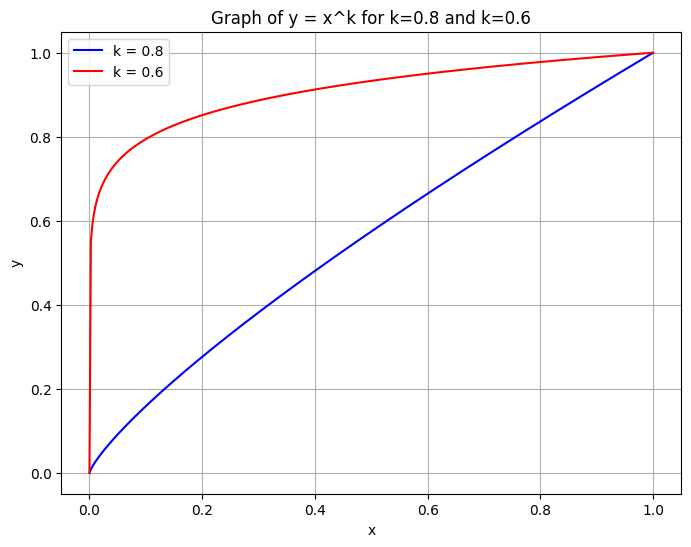

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(0, 1, 400) # 400 points between 0 and 1

# Calculate y values for each k
y_0_8 = x**0.8
y_0_6 = x**0.1

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y_0_8, label='k = 0.8', color='blue')
plt.plot(x, y_0_6, label='k = 0.6', color='red')

# Labeling the axes
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = x^k for k=0.8 and k=0.6')
plt.legend()
plt.grid(True)
plt.show()


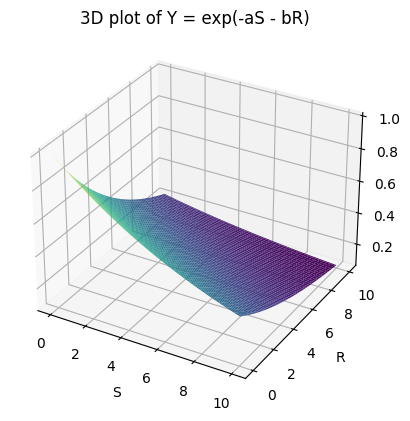

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(S, R, a=0.1, b=0.15):
    return np.exp(-a * S - b * R)

# Generate a range of S and R values
S = np.linspace(0, 10, 100)
R = np.linspace(0, 10, 100)

# Create meshgrid for S and R
S, R = np.meshgrid(S, R)
Y = f(S, R)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S, R, Y, cmap='viridis')

# Labeling
ax.set_xlabel('S')
ax.set_ylabel('R')
ax.set_zlabel('Y')
ax.set_title('3D plot of Y = exp(-aS - bR)')

plt.show()
